In [4]:
#Karar Ağaçları (Decision Trees)
"""
1- Entropy (0-1)
2- Information Gain (Bilgi Kazancı):
3- Gini Impurity (0-0.5)
"""

'\n1- Entropy (0-1)\n2- Information Gain (Bilgi Kazancı):\n3- Gini Impurity (0-0.5)\n'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


In [12]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


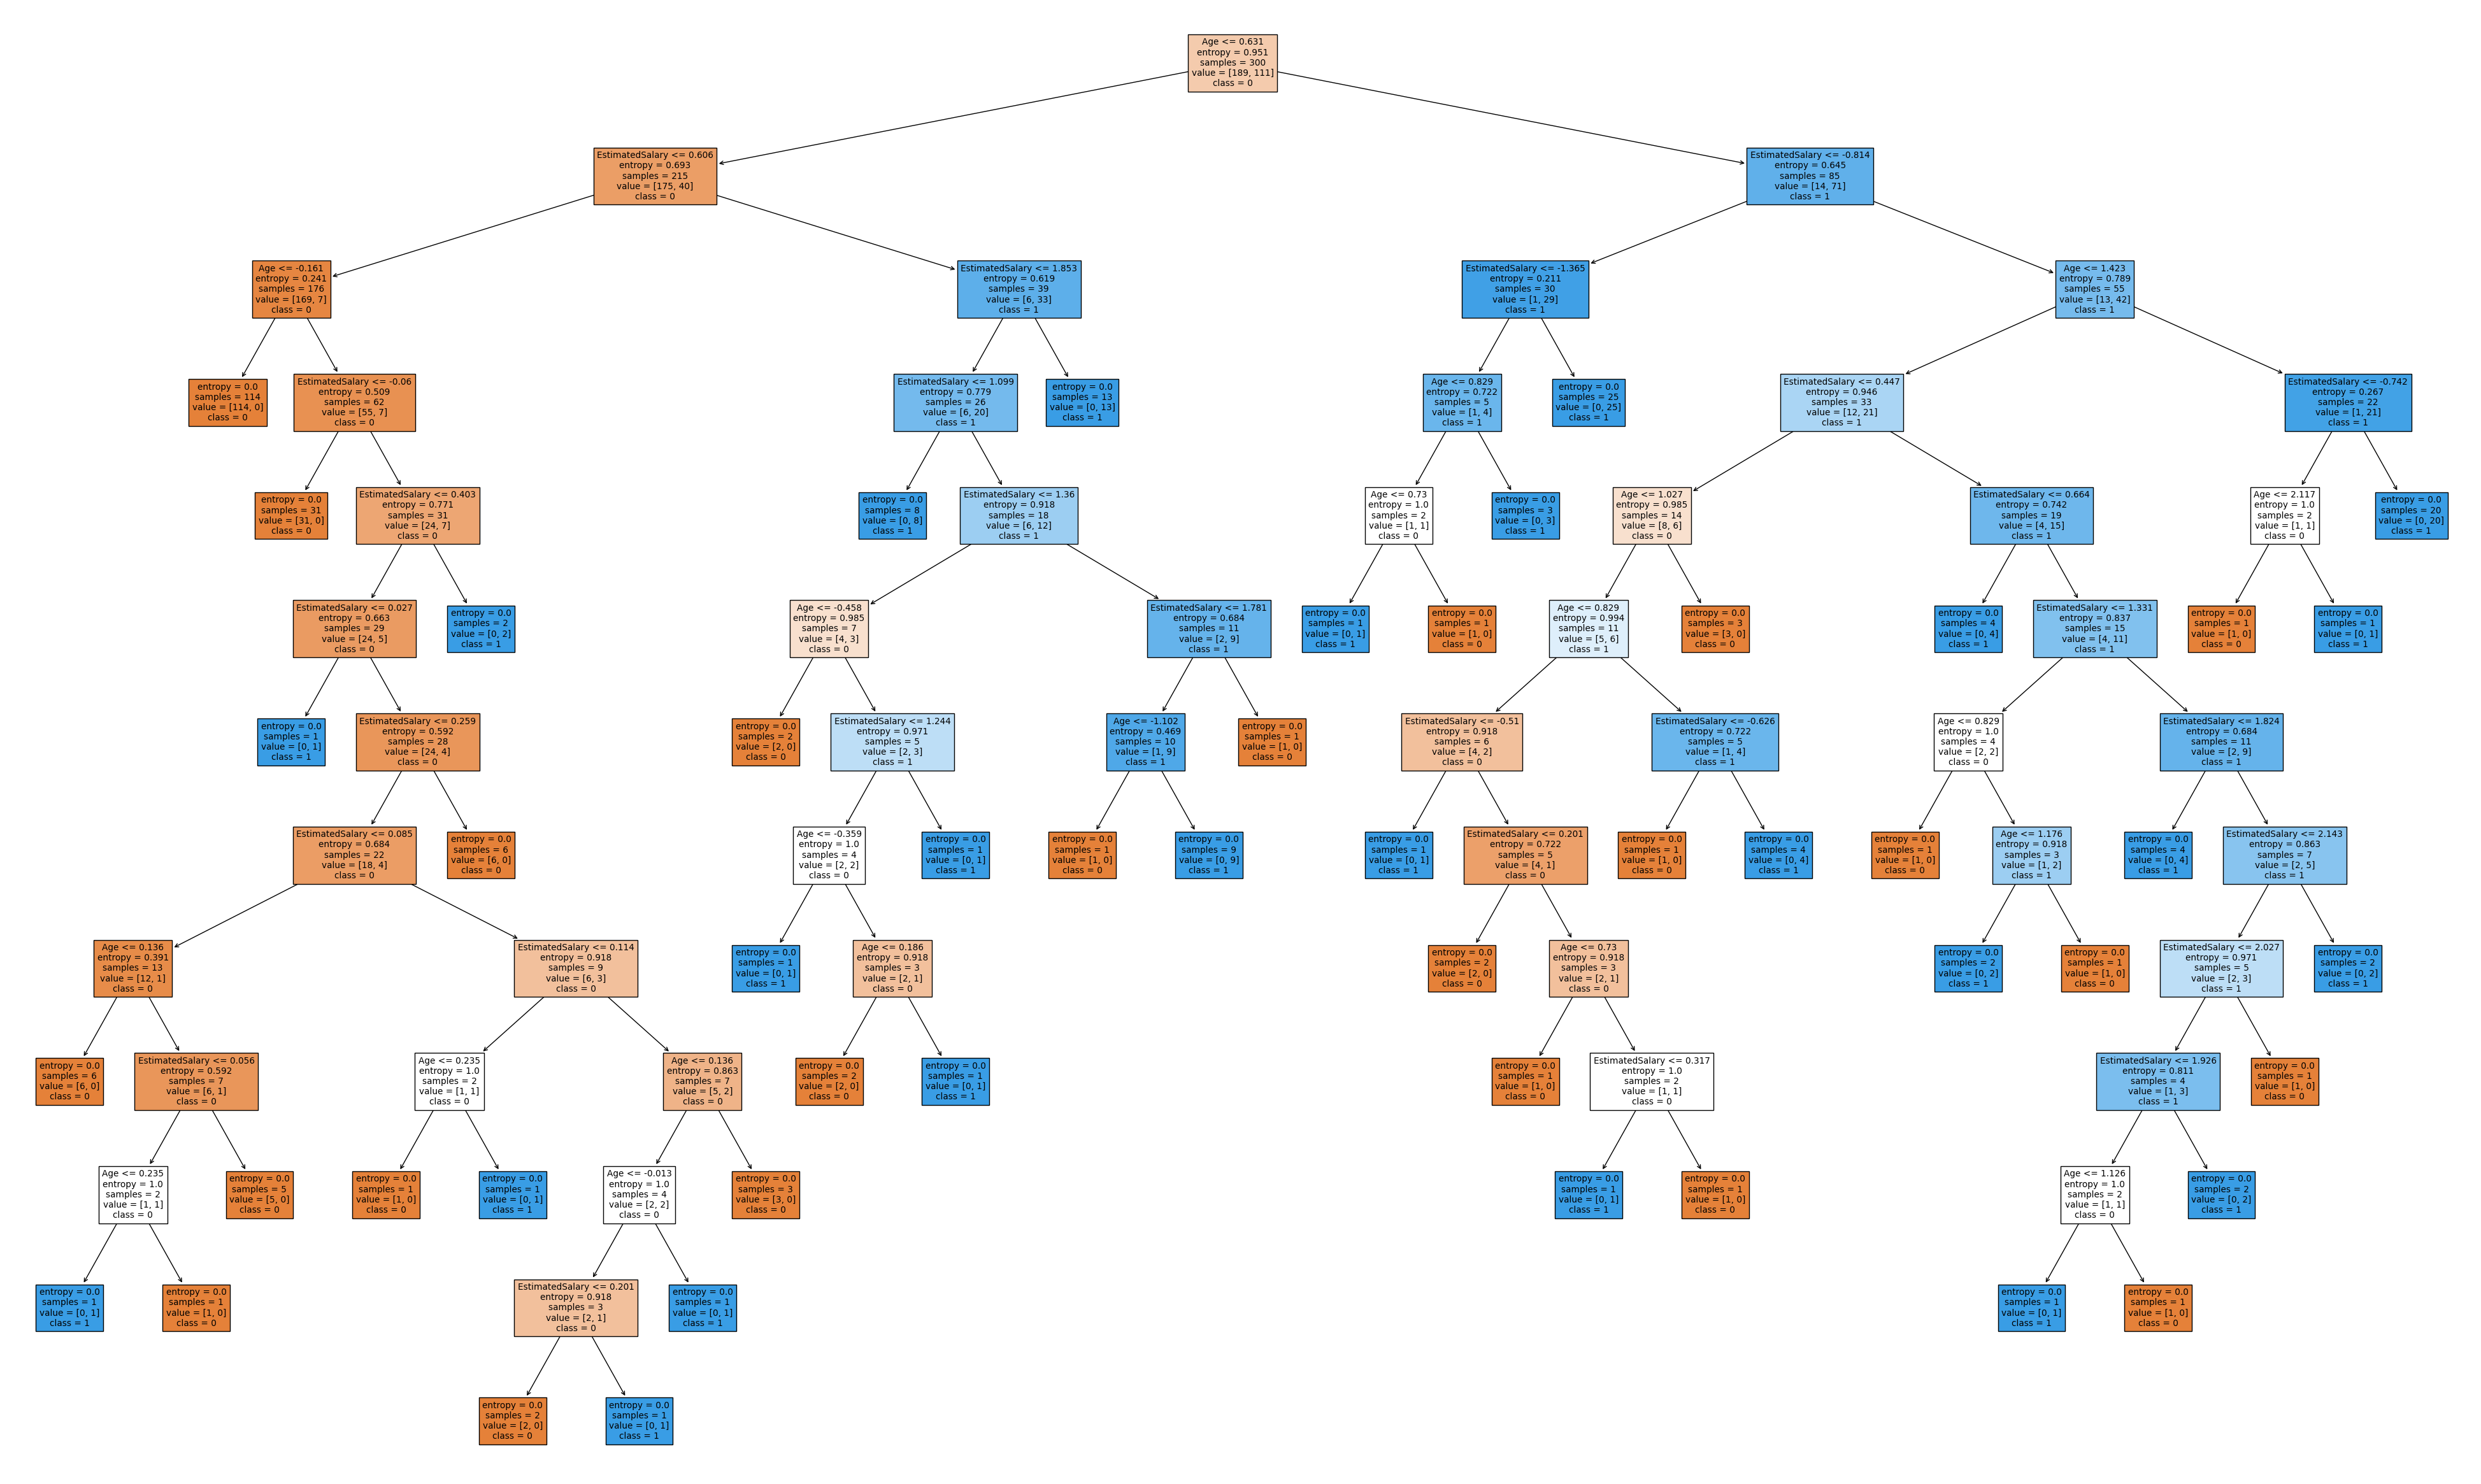

In [13]:
from sklearn import tree
fn = ['Age', 'EstimatedSalary']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,30))
tree.plot_tree(classifier, feature_names = fn, class_names = cn, filled = True)
fig.savefig('1312ibbeco.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


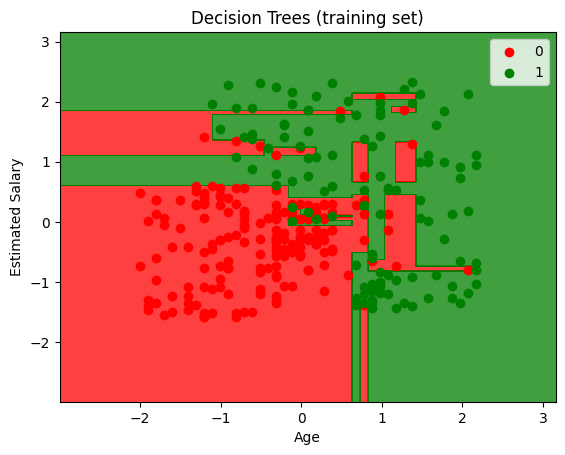

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Trees (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


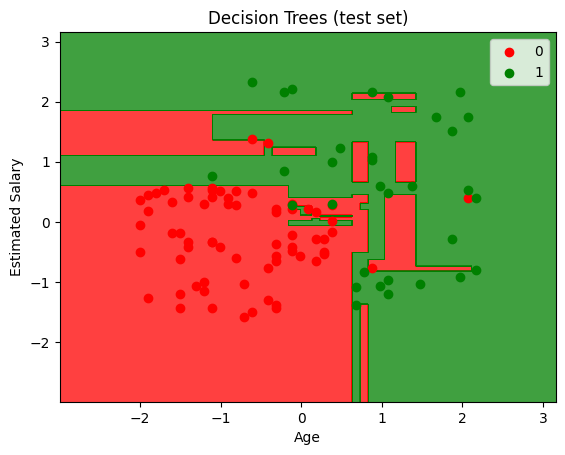

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Decision Trees (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [16]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header = None, names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima.label

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report : ",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy : ", result2)

Confusion Matrix : 
[[116  30]
 [ 45  40]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       146
           1       0.57      0.47      0.52        85

    accuracy                           0.68       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.67      0.68      0.67       231

Accuracy :  0.6753246753246753


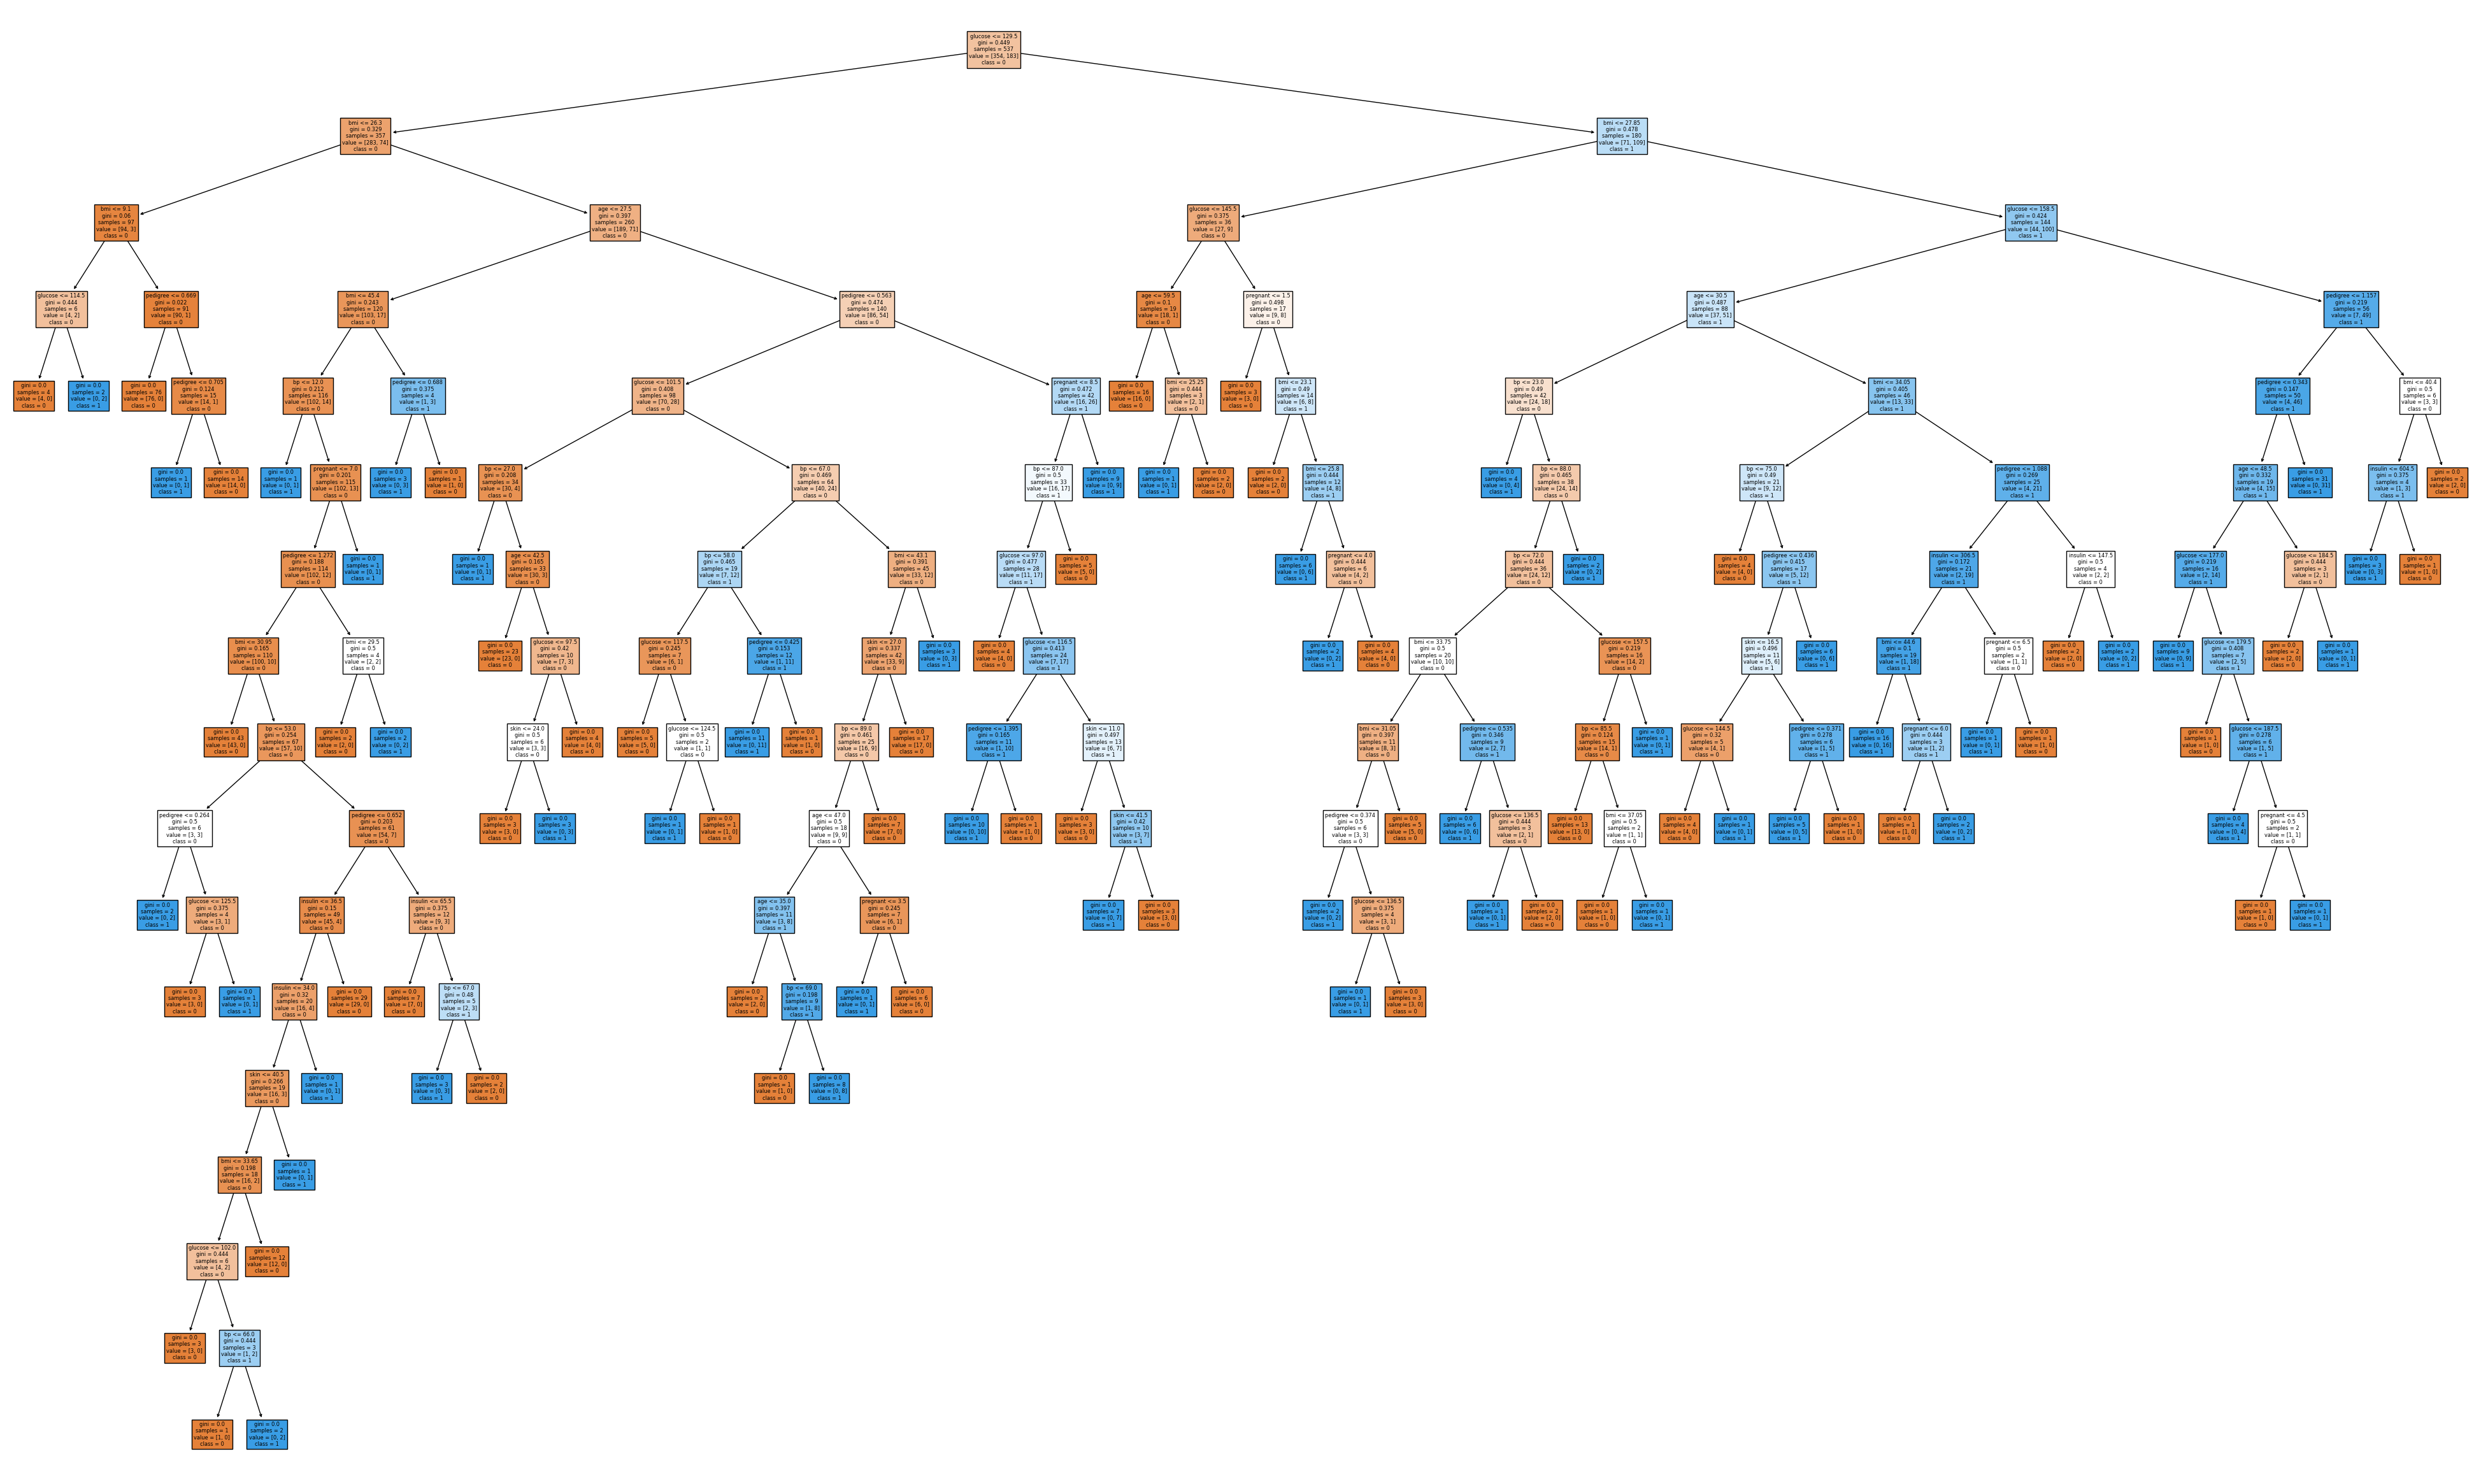

In [22]:
from sklearn import tree
fn = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,30))
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True)
fig.savefig('1312ibbeco2.png')

In [23]:
from sklearn.datasets import load_breast_cancer

In [24]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy : ", clf.score(X_train, y_train))
print("Testing Accuracy : ", accuracy_score(y_test, pred))

Training Accuracy :  1.0
Testing Accuracy :  0.8811188811188811


In [26]:
#Cost Complexity Pruning (Maliyet Karmaşıklı Budama)

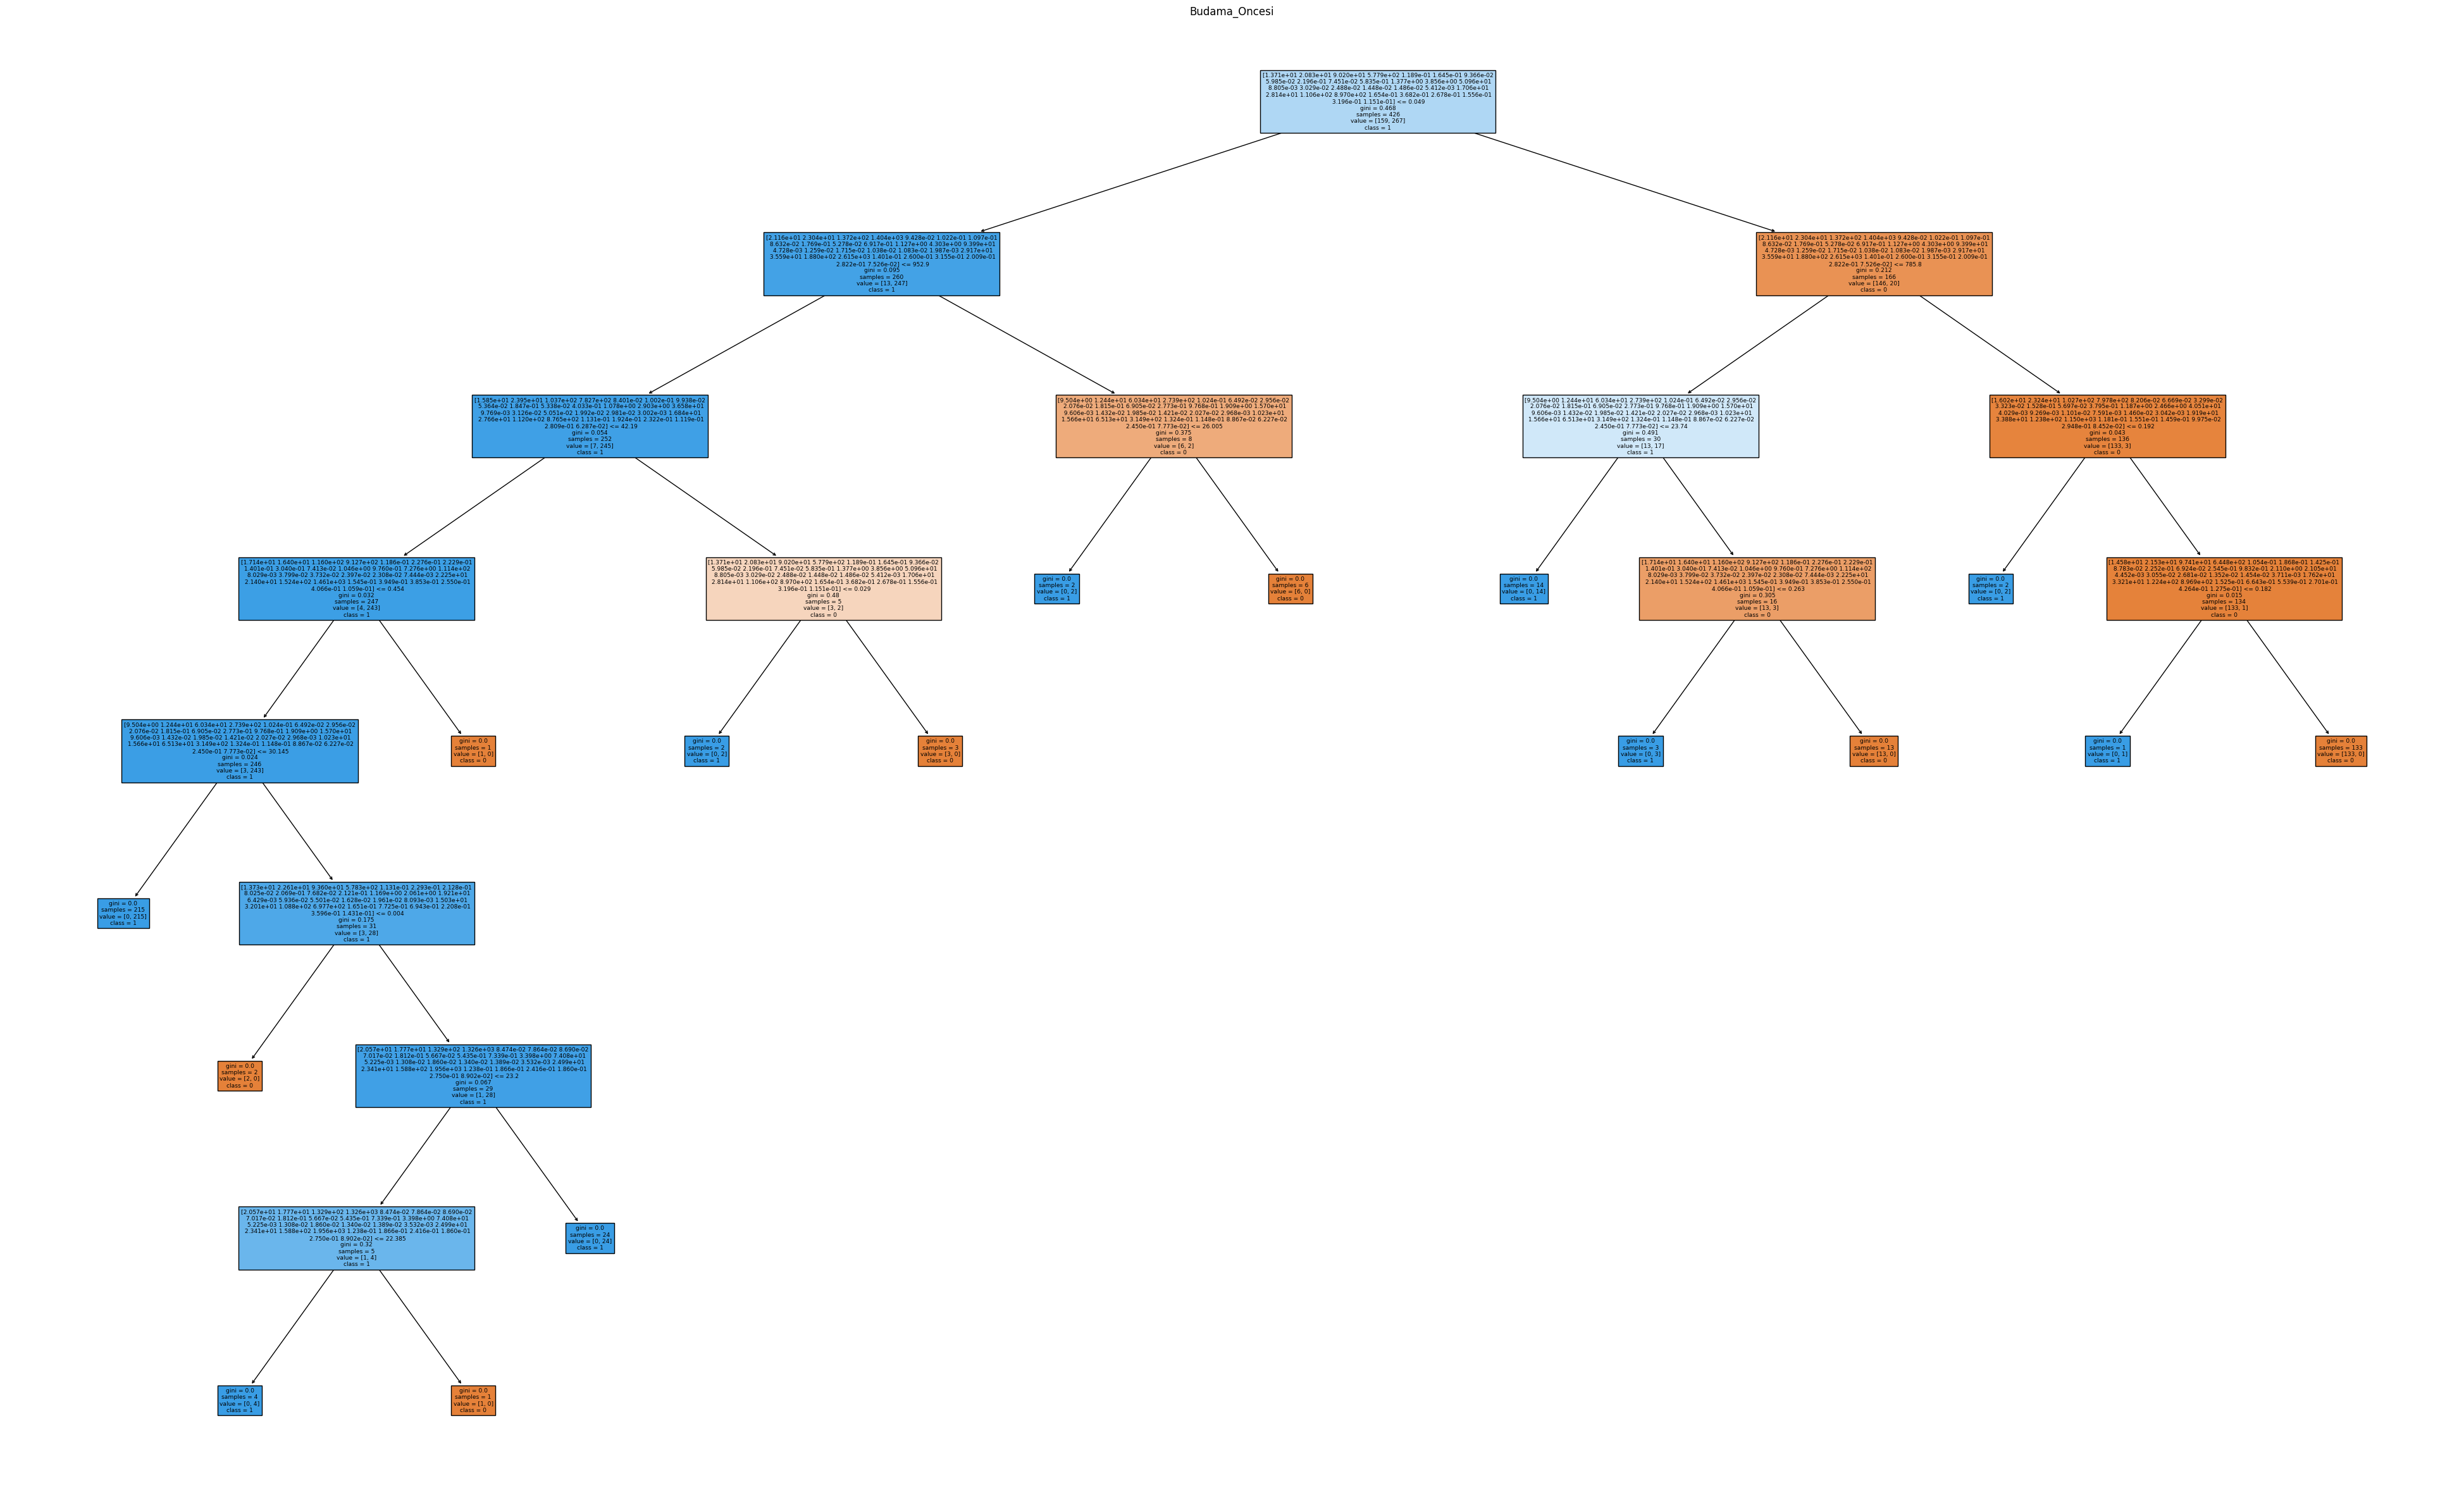

In [27]:
from sklearn import tree
features = X
classes = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,30))
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)
plt.title("Budama_Oncesi")
plt.show()

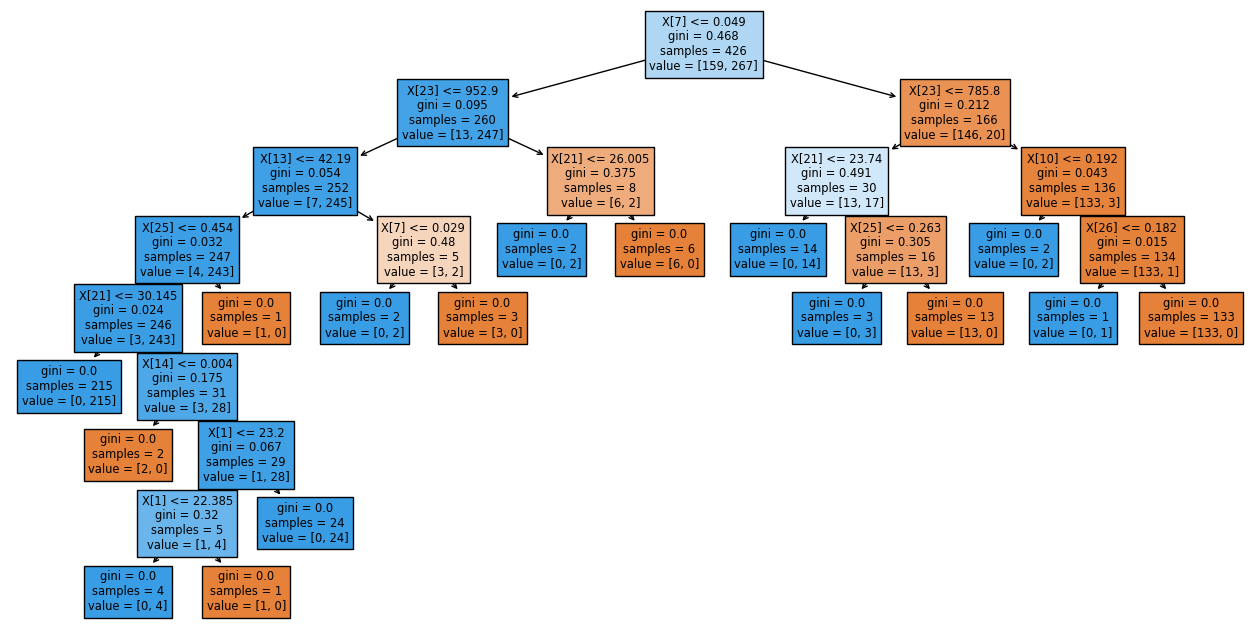

In [28]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf, filled = True)
plt.show()

In [29]:
#Metot 1 : Pre-Pruning
"""
max_depth: ağacın maximum derinliği
min_sample_split : iç düğümü ayırmak için gereken minimum örnek sayısı
min_samples_leaf : yaprak düğüm olarak kalması istenen örnek sayısı
"""

'\nmax_depth: ağacın maximum derinliği\nmin_sample_split : iç düğümü ayırmak için gereken minimum örnek sayısı\nmin_samples_leaf : yaprak düğüm olarak kalması istenen örnek sayısı\n'

In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth' : [2,4,6,8,10,12], 'min_samples_split' : [2,3,4], 'min_samples_leaf' : [1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [31]:
model = gcv.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train Score {accuracy_score(y_train_pred, y_train)}')
print(f'Test Score {accuracy_score(y_test_pred, y_test)}')

Train Score 0.9929577464788732
Test Score 0.8881118881118881


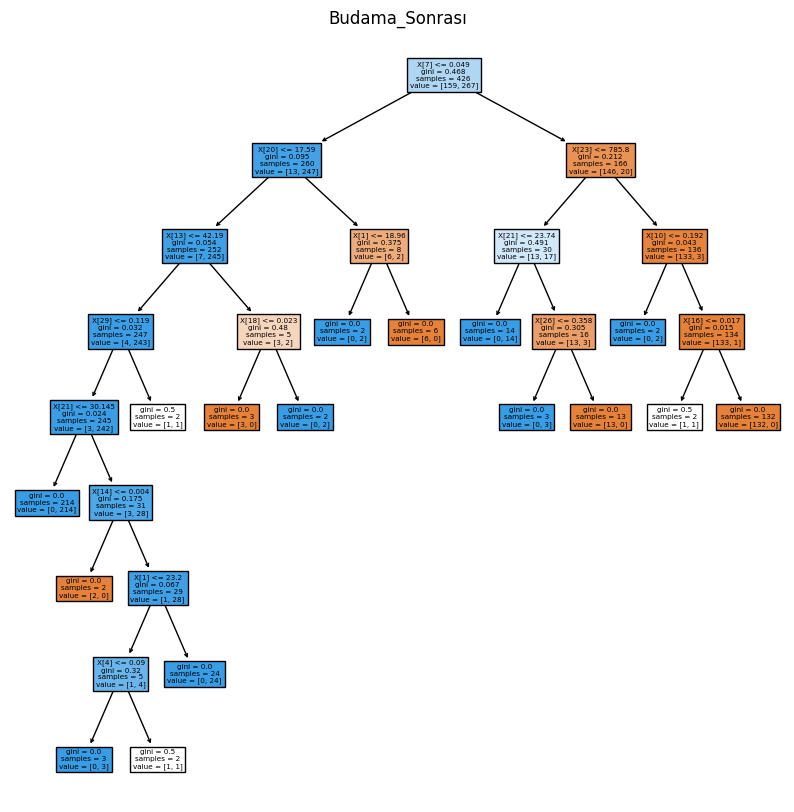

In [32]:
plt.figure(figsize = (10, 10))
#features = X
#classes = ['0', '1']
tree.plot_tree(model, filled = True)
plt.title("Budama_Sonrası")
plt.show()

In [33]:
#Metot 2: Post-Pruning

In [34]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [35]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Geride kalan ağaç: {} için ccp_alpha değeri : {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Geride kalan ağaç: 1 için ccp_alpha değeri : 0.3272984419327777


In [37]:
clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.03)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)

In [38]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training Accuracy : ", clf.score(X_train, y_train))
print("Testing Accuracy : ", accuracy_score(y_test, pred))

Training Accuracy :  0.931924882629108
Testing Accuracy :  0.916083916083916


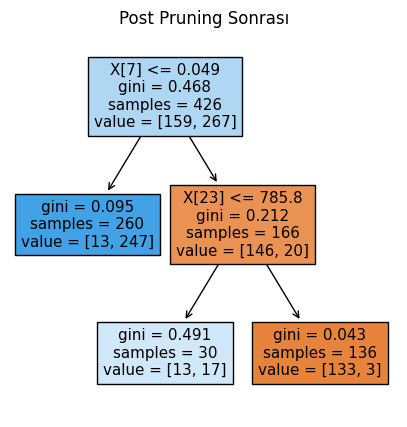

In [39]:
plt.figure(figsize=(5,5))
tree.plot_tree(clf, filled=True)
plt.title("Post Pruning Sonrası")
plt.show()

In [40]:
#Random Forest Algorithm (Rastgele Orman Algoritması)

In [41]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [42]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [43]:
dataset = pd.read_csv(path, names = headernames)
#dataset = pd.read_csv('data/Iris.csv', names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report : ",)
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy : ", result2)

Confusion Matrix : 
[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
Classification Report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy :  0.9777777777777777
